In [1]:
# import reticulate and IRdisplay
library(reticulate)
use_python("/usr/local/bin/python3", required = T)
library(repr)
library(IRdisplay)

In [2]:
# show packages active in current session
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin17.6.0 (64-bit)
Running under: macOS High Sierra 10.13.5

Matrix products: default
BLAS/LAPACK: /usr/local/Cellar/openblas/0.3.3/lib/libopenblasp-r0.3.3.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] IRdisplay_0.6.0.9000 repr_0.15.0          reticulate_1.10     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18         lattice_0.20-35      digest_0.6.17       
 [4] crayon_1.3.4         grid_3.5.1           jsonlite_1.5        
 [7] magrittr_1.5         evaluate_0.11        stringi_1.2.4       
[10] uuid_0.1-2           Matrix_1.2-14        IRkernel_0.8.12.9000
[13] tools_3.5.1          stringr_1.3.1        compiler_3.5.1      
[16] base64enc_0.1-3      htmltools_0.3.6      pbdZMQ_0.3-3        

In [3]:
# create function for mimbe bundle to render 'application/vnd.vegalite.v2+json' objects
repr_vega <- function(obj, ...) UseMethod('repr_vega', obj)
repr_vega.default <- function(obj, ...) NULL

options(jupyter.display_mimetypes = c(getOption('jupyter.display_mimetypes'), 'application/vnd.vegalite.v2+json'))
IRkernel:::replace_in_package('repr', 'mime2repr', c(repr::mime2repr, list(`application/vnd.vegalite.v2+json` = repr_vega)))

In [4]:
# show mimetypes that jupyter can render
options('jupyter.display_mimetypes')

$jupyter.display_mimetypes
 [1] "text/plain"                       "text/html"                       
 [3] "text/markdown"                    "text/latex"                      
 [5] "application/json"                 "application/javascript"          
 [7] "application/pdf"                  "image/png"                       
 [9] "image/jpeg"                       "image/svg+xml"                   
[11] "application/vnd.vegalite.v2+json"

In [5]:
# load the module and enable JSON transform so data is seperated from the spec
alt <- import("altair")
alt$data_transformers$enable('json')

# load data
vega_datasets <- import("vega_datasets")
cars <- vega_datasets$data$cars()

# generate the visualization
chart <- alt$Chart(cars)$mark_point()$encode(
    x = "Horsepower:Q",
    y = "Miles_per_Gallon:Q",
    color = "Origin:N"
)

DataTransformerRegistry.enable('json')

In [6]:
# this should render the mimebundle, but doesn't
chart

Chart({
  data:      Acceleration  Cylinders    ...      Weight_in_lbs       Year
  0            12.0        8.0    ...             3504.0 1970-01-01
  1            11.5        8.0    ...             3693.0 1970-01-01
  2            11.0        8.0    ...             3436.0 1970-01-01
  3            12.0        8.0    ...             3433.0 1970-01-01
  4            10.5        8.0    ...             3449.0 1970-01-01
  5            10.0        8.0    ...             4341.0 1970-01-01
  6             9.0        8.0    ...             4354.0 1970-01-01
  7             8.5        8.0    ...             4312.0 1970-01-01
  8            10.0        8.0    ...             4425.0 1970-01-01
  9             8.5        8.0    ...             3850.0 1970-01-01
  10           17.5        4.0    ...             3090.0 1970-01-01
  11           11.5        8.0    ...             4142.0 1970-01-01
  12           11.0        8.0    ...             4034.0 1970-01-01
  13           10.5        8.0    

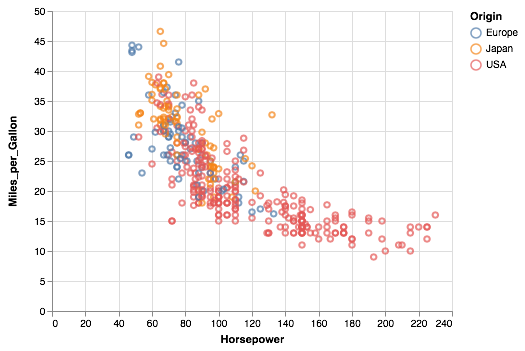

In [7]:
# where pointing manally to the mimebundle, it does render
publish_mimebundle(chart$`_repr_mimebundle_`(include = NULL, exclude = NULL)[[1]])